In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp

In [11]:
Delta = -2; delta = 0.

H0 = np.array([[1.]])
mu_q = np.zeros((3, 1, 1))
d_q = np.zeros((3, 1, 1))
d_q[1, 0, 0,] = 1/np.sqrt(2)

def return_three_level_hamiltonian(Delta, delta):
    hamiltonian = pylcp.hamiltonian()
    hamiltonian.add_H_0_block('g', 0.*H0)
    hamiltonian.add_H_0_block('r', delta*H0)
    hamiltonian.add_H_0_block('e', -Delta*H0)
    hamiltonian.add_d_q_block('g','e', d_q)
    hamiltonian.add_d_q_block('r','e', d_q,gamma=0.06)

    return hamiltonian

hamiltonian = return_three_level_hamiltonian(Delta, delta)
hamiltonian.print_structure()

[[(<g|H_0|g> 1x1) None (<g|d_q|e> 1x1)]
 [None (<r|H_0|r> 1x1) (<r|d_q|e> 1x1)]
 [(<e|d_q|g> 1x1) (<e|d_q|r> 1x1) (<e|H_0|e> 1x1)]]


In [12]:
# First, define the lasers (functionalized for later):
Ige = 4; Ire = 4;
def return_three_level_lasers(Ige, Ire):
    laserBeams = {}
    laserBeams['g->e'] = pylcp.laserBeams(
        [{'kvec':np.array([1., 0., 0.]), 'pol':np.array([0., 1., 0.]),
          'pol_coord':'spherical', 'delta':0., 's':Ige}],
        beam_type=pylcp.infinitePlaneWaveBeam
    )
    laserBeams['r->e'] = pylcp.laserBeams(
        [{'kvec':np.array([1., 0., 0.]), 'pol':np.array([0., 1., 0.]),
          'pol_coord':'spherical', 'delta':0., 's':Ire}],
        beam_type=pylcp.infinitePlaneWaveBeam
    )
    return laserBeams

laserBeams = return_three_level_lasers(Ige, 0)

# Second, magnetic field:
magField = lambda R: np.zeros(R.shape)

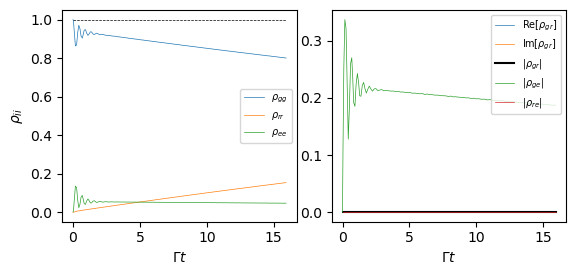

In [13]:
obe = pylcp.obe(laserBeams, magField, hamiltonian,
                transform_into_re_im=True)
obe.set_initial_rho_from_populations(np.array([1., 0., 0.]))
obe.evolve_density([0, 100])

fig, ax = plt.subplots(1, 2, figsize=(6.5, 2.75))
ax[0].plot(obe.sol.t/2/np.pi, np.real(obe.sol.rho[0, 0]), linewidth=0.5, label='$\\rho_{gg}$')
ax[0].plot(obe.sol.t/2/np.pi, np.real(obe.sol.rho[1, 1]), linewidth=0.5, label='$\\rho_{rr}$')
ax[0].plot(obe.sol.t/2/np.pi, np.real(obe.sol.rho[2, 2]), linewidth=0.5, label='$\\rho_{ee}$')
ax[0].plot(obe.sol.t/2/np.pi, np.real(obe.sol.rho[0, 0]+obe.sol.rho[1, 1]+obe.sol.rho[2, 2]), 'k--', linewidth=0.5)
ax[0].legend(fontsize=7)
ax[0].set_xlabel('$\Gamma t$')
ax[0].set_ylabel('$\\rho_{ii}$')

ax[1].plot(obe.sol.t/2/np.pi, np.real(obe.sol.rho[0, 1]), linewidth=0.5,
           label='Re$[\\rho_{gr}]$')
ax[1].plot(obe.sol.t/2/np.pi, np.imag(obe.sol.rho[0, 1]), linewidth=0.5,
           label='Im$[\\rho_{gr}]$')
ax[1].plot(obe.sol.t/2/np.pi, np.abs(obe.sol.rho[0, 1]), 'k-',
           label='$|\\rho_{gr}|$')
ax[1].plot(obe.sol.t/2/np.pi, np.abs(obe.sol.rho[0, 2]), linewidth=0.5, label='$|\\rho_{ge}|$')
ax[1].plot(obe.sol.t/2/np.pi, np.abs(obe.sol.rho[1, 2]), linewidth=0.5, label='$|\\rho_{re}|$')
ax[1].legend(fontsize=7)
ax[1].set_xlabel('$\Gamma t$')

fig.subplots_adjust(wspace=0.15)